## Project Outline
* Load Data
* Exploratory Analysis
* Initial Model
* Evaluation
* Feature Engineering
* Model 2
* Evaluation
* Further Investigation/Exploration

## Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotnine
from plotnine import *

In [2]:
df1 = pd.read_csv('./Datasets/features.csv')
print('Length of Dataset: ', len(df1))
print('Column Names:\n', df1.columns)
df1.head()

Length of Dataset:  8190
Column Names:
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
df2 = pd.read_csv('./Datasets/Walmart_Sales_Forecasting.csv')
print(len(df2))
df2.head()


421570


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:

final = pd.merge(df1, df2, on=['Store', 'Date',]) #which two dataframes to combine, and what columns to merge data in on.
final.head()



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False


In [5]:

final=final.dropna()

In [7]:
final.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
6587,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False
6588,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False
6589,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False
6590,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False
6591,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False


## Exploratory Data Analysis

In [8]:
df= final
print('Column Names:\n', df.columns)


Column Names:
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Dept', 'Weekly_Sales', 'IsHoliday_y'],
      dtype='object')


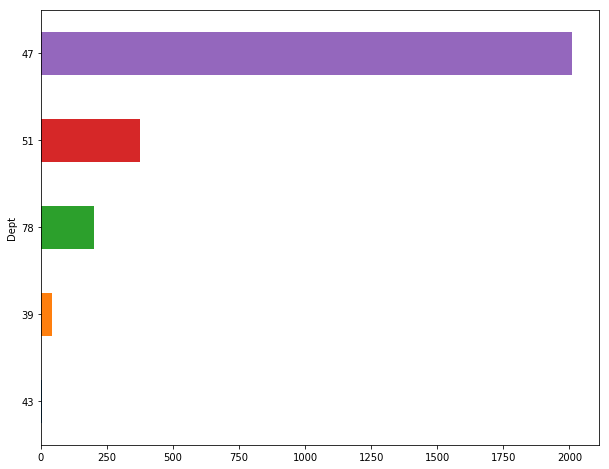

In [9]:
df.groupby('Dept')['Weekly_Sales'].sum().sort_values().head().plot(kind='barh',figsize=(10,8))




In [10]:
# this is to look up the types
df.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_x        bool
Dept              int64
Weekly_Sales    float64
IsHoliday_y        bool
dtype: object

In [12]:
#make dates a date type not object 
pd.to_datetime(df.Date).head()


6587   2011-11-11
6588   2011-11-11
6589   2011-11-11
6590   2011-11-11
6591   2011-11-11
Name: Date, dtype: datetime64[ns]

In [13]:
#filter a col (its .loc[]) then filter out the dates to what I want
#to do this
df.loc[
    
    #select date col
    df["Date"]<="2011-01-01" 
]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y


C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_mat

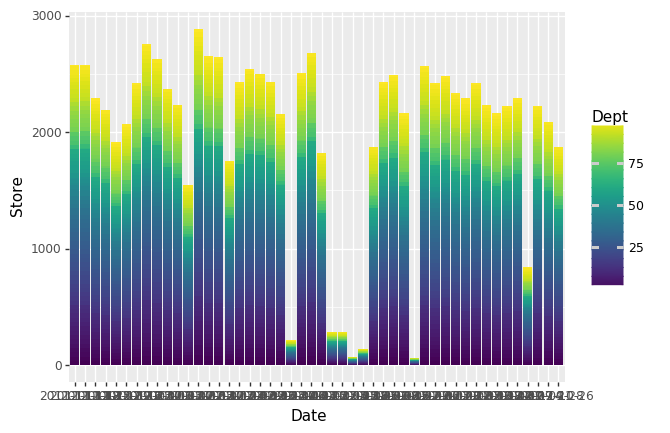

<ggplot: (-9223371881737901168)>

In [14]:
# pretty but doesnt say a lot

my_plot=df.groupby(["Dept", 'Date']).count()[["Store"]]

my_plot.reset_index(inplace= True)

my_plot#Your code here

(ggplot(my_plot, aes(x='Date', y='Store', fill='Dept'))
 + geom_col()
)

C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_mat

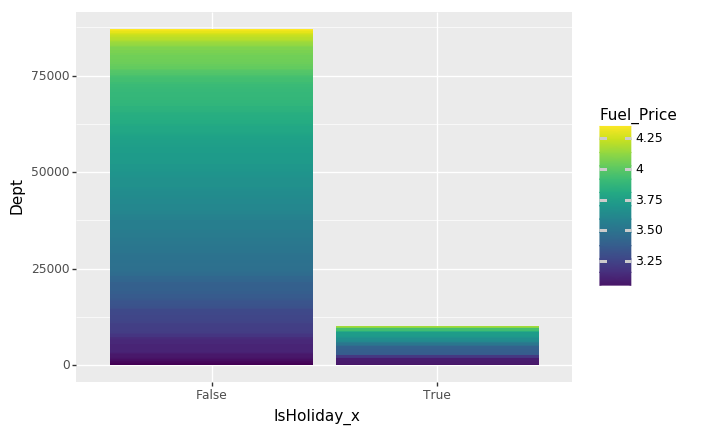

<ggplot: (155117460975)>

In [15]:
my_plot=df.groupby(["Fuel_Price", 'IsHoliday_x']).count()[["Dept"]]

my_plot.reset_index(inplace= True)

my_plot#Your code here

(ggplot(my_plot, aes(x='IsHoliday_x', y='Dept', fill='Fuel_Price'))
 + geom_col()
)

# pretty but doesnt say a lot


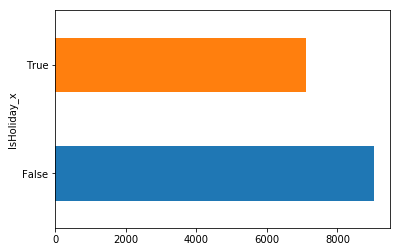

In [16]:
df.groupby('IsHoliday_x').mean()["MarkDown1"].plot(kind="barh")


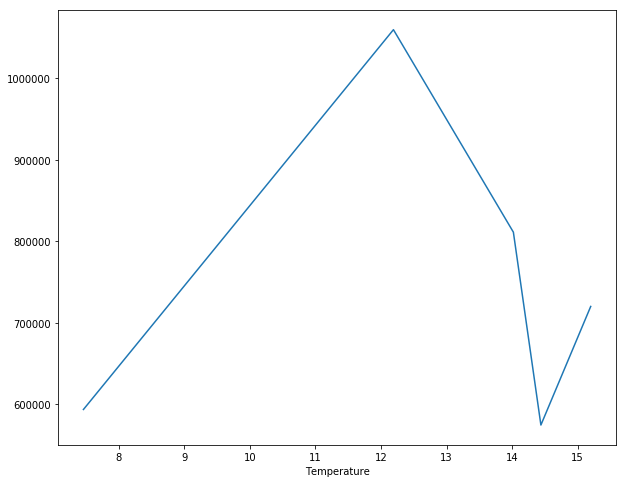

In [17]:
df.groupby('Temperature')['Weekly_Sales'].sum().head().plot(kind='line',figsize=(10,8))


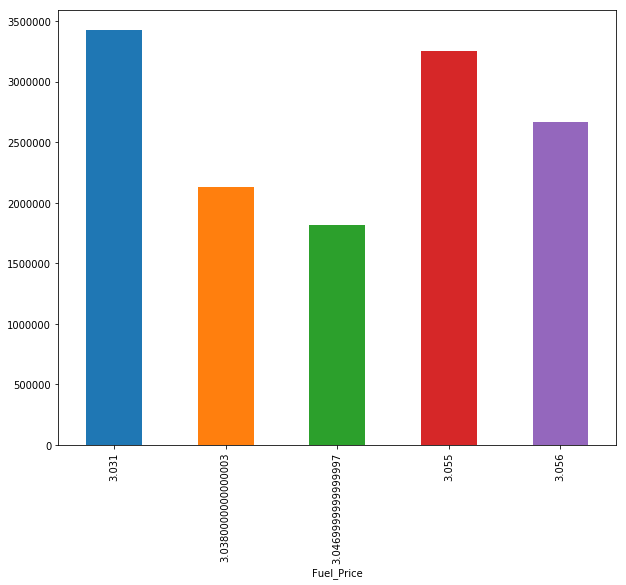

In [18]:
df.groupby('Fuel_Price')['Weekly_Sales'].sum().head().plot(kind='bar',figsize=(10,8))


C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this w

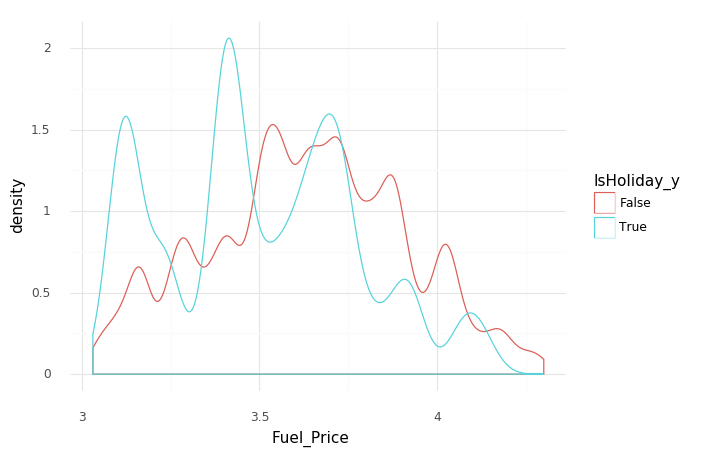

<ggplot: (-9223371881736629367)>

In [19]:
plt_df = df.assign(Survived = lambda d: d['IsHoliday_y'].map(bool))
(ggplot(plt_df, aes(x='Fuel_Price', color='IsHoliday_y'))
 + geom_density()
 + theme_minimal()
)

#looks like holiday and fuel might be related

C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_mat

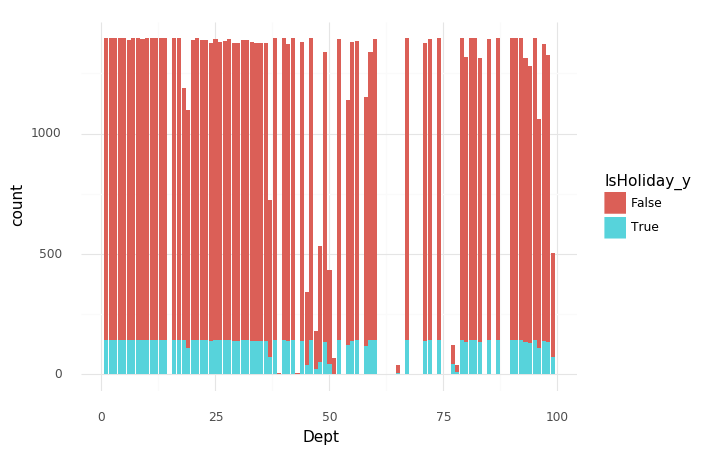

<ggplot: (-9223371881736607288)>

In [20]:
plt_df = df.assign(Survived = lambda d: d['IsHoliday_y'].map(bool))
(ggplot(plt_df, aes(x='Dept', fill='IsHoliday_y'))
 + geom_bar()
 + theme_minimal()
)

#this is cool but doesn't really mean anything

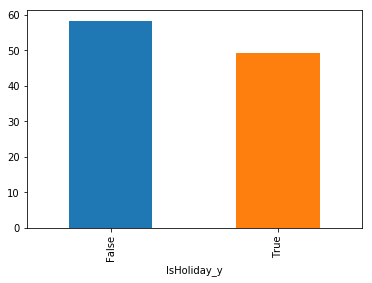

In [21]:
df.groupby('IsHoliday_y').mean()["Temperature"].plot(kind="bar")


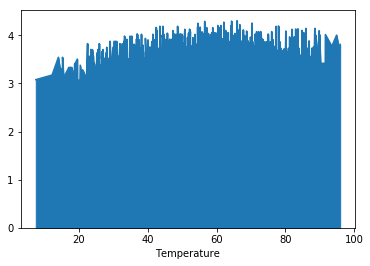

In [22]:
df.groupby('Temperature').mean()["Fuel_Price"].plot(kind="area")


[[ 1.         -0.00161513]
 [-0.00161513  1.        ]]


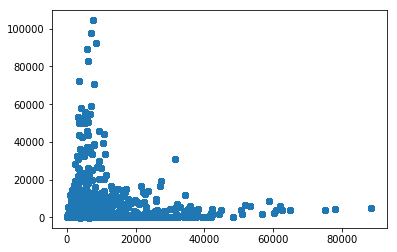

In [23]:

# plots 1st markdown against second
x , y = df.MarkDown1, df.MarkDown2
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[1.         0.82892769]
 [0.82892769 1.        ]]


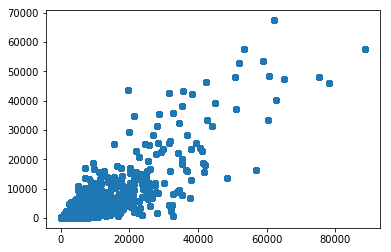

In [24]:

# plots 1st markdown against 4th- a nearly perfect coorlation- may want to take out of model 
x , y = df.MarkDown1, df.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[1.         0.02947115]
 [0.02947115 1.        ]]


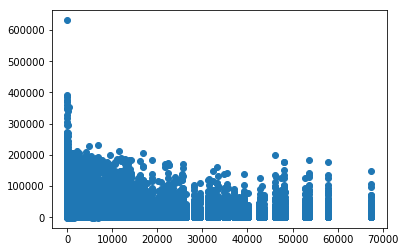

In [25]:

# plots 4th markdown against weekly_sales
x , y = df.MarkDown4, df.Weekly_Sales
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[1.         0.01302933]
 [0.01302933 1.        ]]


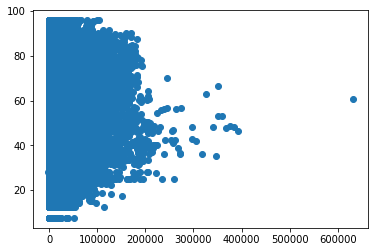

In [26]:
x , y = df.Weekly_Sales, df.Temperature
print(np.corrcoef(x,y))
plt.scatter(x,y)

##  Models/ evaluation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
#get mean sqaured error comparing Temp and Weekly sales


#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y

my_X_columns = [ 'Temperature', 
               ]
my_y_column = 'Weekly_Sales'
X = df[my_X_columns] #Only numeric features work
y = df[my_y_column]

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

#define xtrain and x test 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# predicator
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)





# 6) Measure performance using mean squared

train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

#Print the coefficients for the model's formula
print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
   print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))


Train Mean Squared Error: 24630.50022344427
Test Mean Squared Error: 25025.643172993954
Model feature coefficients:
Temperature Coefficient weight: 17.6439


In [29]:
#add some more x's and use mean squared error and drop na add some more x's

df = df.dropna()

#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = df[['Store', 'Temperature', 'Unemployment', 'Dept']] #Only numeric features work

y = df['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

#define xtrain and x test 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# predicator
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)





# 6) Measure performance using mean squared

train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

#Print the coefficients for the model's formula
print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
   print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))




Train Mean Squared Error: 24353.539025391252
Test Mean Squared Error: 24742.467553226947
Model feature coefficients:
Store Coefficient weight: -98.7044
Temperature Coefficient weight: 7.6445
Unemployment Coefficient weight: -396.8342
Dept Coefficient weight: 113.0


In [30]:
## printing the shape
X.shape, y.shape

((97056, 4), (97056,))

In [31]:
#check all num coeff, except for markdown4, which has a perfect correclation
# Code from above

df = df.dropna()

#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
         'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = df['Weekly_Sales']



#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

#define xtrain and x test 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#5) predicator
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)



# 6) Measure performance using mean squared

train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

#Print the coefficients for the model's formula
print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

Train Mean Squared Error: 24192.77798053246
Test Mean Squared Error: 24613.437060410462
Model feature coefficients:
Store Coefficient weight: -108.0325
Temperature Coefficient weight: 39.7291
Fuel_Price Coefficient weight: -692.1175
MarkDown1 Coefficient weight: 0.1078
MarkDown2 Coefficient weight: 0.0658
MarkDown3 Coefficient weight: 0.1621
MarkDown5 Coefficient weight: 0.2407
CPI Coefficient weight: -29.8958
Unemployment Coefficient weight: -612.1828
Dept Coefficient weight: 112.1943


In [32]:
# lowered the mean squared error by not by enough- use dummys/feature eng and re-eval

## Creat dummys, new model (Model2), feature eng2 and re-reval2

In [33]:
for col in ['Store', 'Dept']:# makes a bunch of colums into numeric "dummy" values at the same time
   df[col] = df[col].astype(str) #Make nonumeric

In [34]:

##tun all categorical into a dummys so code can analyze them 
NewX = pd.get_dummies(df[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'IsHoliday_x']])
X.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Dept
6587,1,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,1
6588,1,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,2
6589,1,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,3
6590,1,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,4
6591,1,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,5


In [35]:
df.IsHoliday_x = df.IsHoliday_x.map({True:1, False:0})# convert category into numeric so IsHoliday column can be use in analysis
df.IsHoliday_x.value_counts()

0    87064
1     9992
Name: IsHoliday_x, dtype: int64

In [36]:
#now use dummys as x

df = df.dropna()

#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = NewX
y = df['Weekly_Sales']



#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

#define xtrain and x test 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#5) predicator
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)



# 6) Measure performance using mean squared

train_mse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

#Print the coefficients for the model's formula
print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

Train Mean Squared Error: 13903.487991654401
Test Mean Squared Error: 14120.86999532327
Model feature coefficients:
Temperature Coefficient weight: -4.3264
Fuel_Price Coefficient weight: -2795.6944
MarkDown1 Coefficient weight: -0.0237
MarkDown2 Coefficient weight: -0.0789
MarkDown3 Coefficient weight: 0.0745
MarkDown5 Coefficient weight: -0.0122
CPI Coefficient weight: -293.0222
Unemployment Coefficient weight: 1127.6705
IsHoliday_x Coefficient weight: 710.5935
Store_1 Coefficient weight: 21556.2691
Store_10 Coefficient weight: 1147.956
Store_11 Coefficient weight: 20112.5936
Store_12 Coefficient weight: -16195.5983
Store_13 Coefficient weight: 3192.806
Store_14 Coefficient weight: 16332.3281
Store_15 Coefficient weight: -16958.717
Store_16 Coefficient weight: 312.9134
Store_17 Coefficient weight: -13272.0332
Store_18 Coefficient weight: -10471.4477
Store_19 Coefficient weight: -4994.6222
Store_2 Coefficient weight: 26939.4036
Store_20 Coefficient weight: 28430.2893
Store_21 Coefficie

In [37]:
#train and test are pretty close!! this is good

## Further Investigation/Exploration

In [38]:
#lets add normalizing
features = [col for col in df.columns if df[col].dtype in [np.float64, np.int64] and col!='Weekly_Sales']
X = df[features]
#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)
y = df.Weekly_Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
ols = LinearRegression(normalize=True)
ols.fit(X_train, y_train)
print('Training r^2:', ols.score(X_train, y_train))
print('Testing r^2:', ols.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, ols.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, ols.predict(X_test))))


C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Training r^2: 0.014583611114629691
Testing r^2: 0.01235870083732793
Training MSE: 24458.786753357923
Testing MSE: 24853.031048087232


In [82]:


X = df.drop('Weekly_Sales', axis=1)
#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)
y = df.Weekly_Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
ols = LinearRegression(normalize=True)
ols.fit(X_train, y_train)

print('Training r^2:', ols.score(X_train, y_train))
print('Testing r^2:', ols.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, ols.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, ols.predict(X_test))))


#this has a higher r^2 and lower MSE- this is good!

Training r^2: 0.6862670506026003
Testing r^2: 0.6920569220248356
Training MSE: 13769.689988536154
Testing MSE: 13967.769797113539


In [39]:
from sklearn.linear_model import Lasso, Ridge, RidgeCV

L1 = Lasso() #Lasso is also known as the L1 norm.
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))


Training r^2: 0.014583553720401987
Testing r^2: 0.0123628281586865
Training MSE: 24458.787465642177
Testing MSE: 24852.97911802258


In [85]:
L1 = Lasso(alpha=5) #changing up the alpha to see what happens
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))

C:\Users\fogelrac\AppData\Local\Continuum\anaconda3\anaconda3.7\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training r^2: 0.6851676635822603
Testing r^2: 0.691014120316276
Training MSE: 13793.794851887722
Testing MSE: 13991.399657684291


In [40]:
#sligtly higher MSE so lower aplha is better

In [41]:
L1 = Lasso(alpha=.5) #changing up the alpha to see what happens
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))

Training r^2: 0.01458359676607246
Testing r^2: 0.012360778739137102
Training MSE: 24458.786931428996
Testing MSE: 24853.0049038862
